<a href="https://colab.research.google.com/github/KIM-CHAEYOUNG/Visualization/blob/master/seaborn_tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Visualizing statistical relationships
[seaborn_tutorial](https://seaborn.pydata.org/tutorial/relational.html)

In [3]:
# 패키지 설치
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Relating variables with scatter plots
- numeric variables
- infer a substantial amount of information where there is any 'meaningful' relationship between them
  + scatterplot() or relplot(kind="scatter)

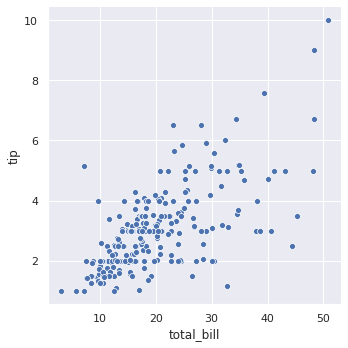

In [4]:
#데이터 읽어오기
tips = sns.load_dataset("tips")

#scatter plots # sns.relplot과 같은 기능 => kind="scatter" 설정
sns.relplot(x="total_bill", y="tip", data=tips)

sns.relplot(
  - **x=None, y=None,** 
  - hue=None, size=None, style=None, 
  - **data=None,**
  - row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)

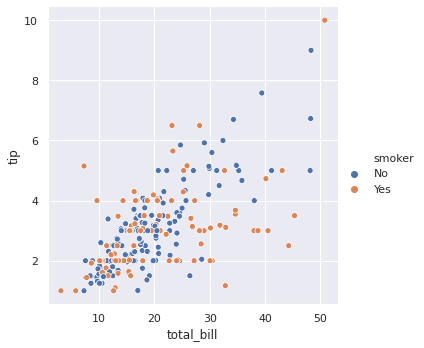

In [5]:
#hue 조건 설정 # marker : class별 차이 강조
sns.relplot(x='total_bill', y='tip', hue='smoker', data=tips)

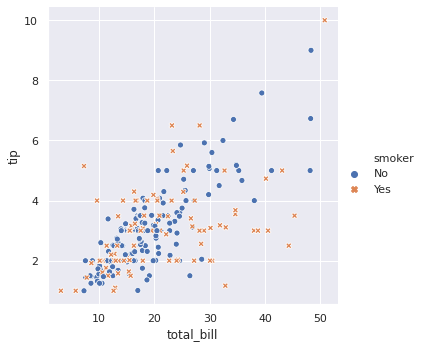

In [6]:
# style 조건 추가
sns.relplot(x='total_bill', y='tip', hue='smoker', style='smoker', data=tips)

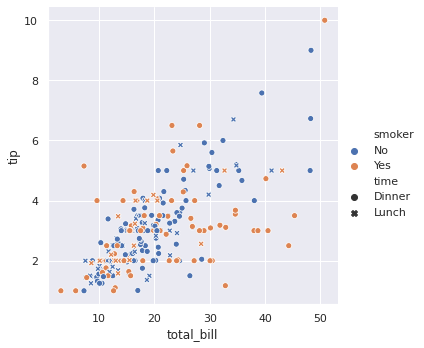

In [7]:
# style 조건 변경
sns.relplot(x='total_bill', y='tip', hue='smoker', style='time', data=tips)

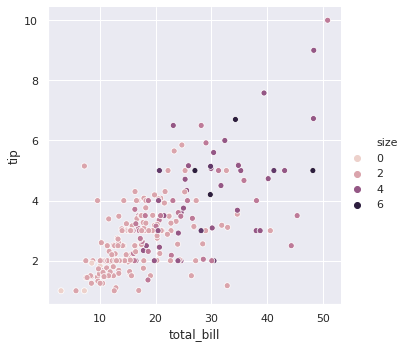

In [8]:
# 
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

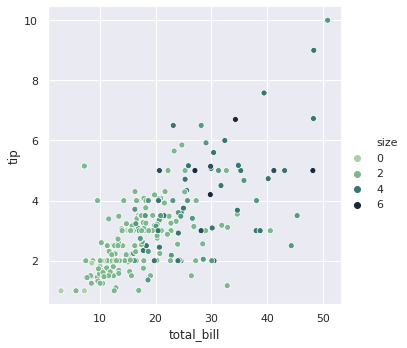

In [9]:
# palette를 통한 색깔 지정 가능 # sequential
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips)

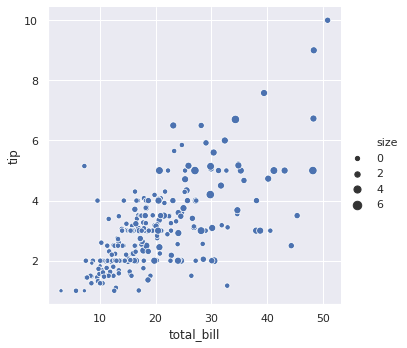

In [10]:
# 변수마다 사이즈 변경 # size=size
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

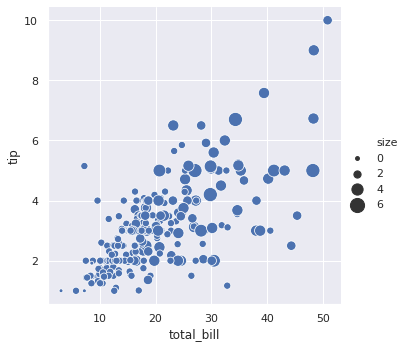

In [12]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15,200), data=tips)

In "Seaborn",  the literal value of the variable is not used to pick the area of the point.
Instead, the range of values in data units is normalized into a range in area units. 


### Emphasizaing continuity with line plots
- understand changes as a function of time
- understand a similarly continuous variable

  + lineplot() or relplot(kind="line")

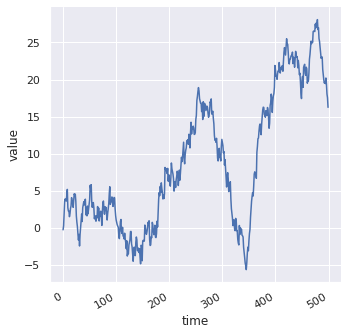

In [15]:
df=pd.DataFrame(dict(time=np.arange(500),
                     value=np.random.randn(500).cumsum()))

g=sns.relplot(x="time", y="value", kind="line", data=df)

g.fig.autofmt_xdate()

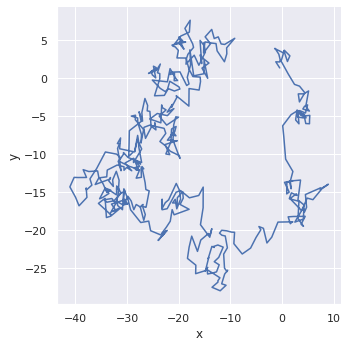

In [16]:
# y= f(x)가 아닌 x=f(y) 그래프를 그릴 때

df=pd.DataFrame(np.random.randn(500,2).cumsum(axis=0), columns=["x","y"])

sns.relplot(x="x", y="y", sort=False, kind="line", data=df)

### Aggregation and representing uncertainty
- multiple measurements for the same value of the x variable
- to aggregate the multiple measurements at each x value by plotting the mean and the 95%confidence interval around the mean

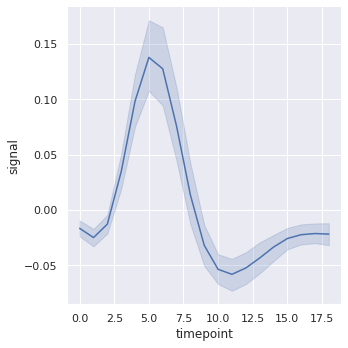

In [17]:
fmri=sns.load_dataset("fmri")

sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

**Good option with larger data 1**

The confidence intervals are computed using bootstrapping
- time-intensive for larger datasets


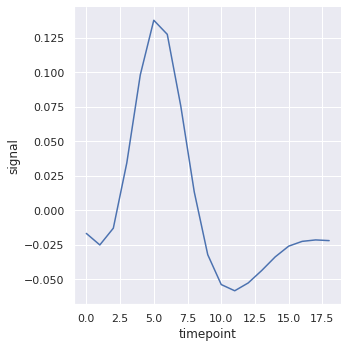

In [19]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri)

**Good option with larger data 2**
- to represent the spread of the distribution at each timepoint
- by plotting the standard deviation 

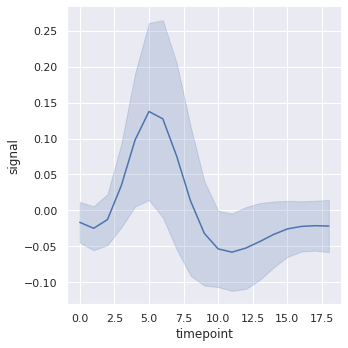

In [20]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

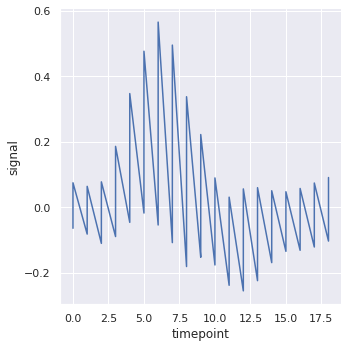

In [21]:
# the esimator parameter to None
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri)